In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.rcParams["axes.unicode_minus"] = False

In [2]:
df = pd.read_csv("comparison.csv")
# df

In [3]:
origin = df.iloc[:5].reset_index(drop=True)
base1 = df.iloc[5:10].reset_index(drop=True)
base2 = df.iloc[10:15].reset_index(drop=True)
base3 = df.iloc[15:20].reset_index(drop=True)
base4 = df.iloc[20:25].reset_index(drop=True)

In [4]:
def get_error(row):
    errs = []
    for i in range(5):
        errs.append(np.absolute(row[i] - row["mean"]))
    return sum(errs) / 5

def get_data(df):
    df = df.T
    df["mean"] = df.mean(axis=1)
    df["min"] = df.min(axis=1)
    df["max"] = df.max(axis=1)
    df["error"] = df.apply(get_error, axis=1)
    return df.reset_index()

In [5]:
df_data_origin = get_data(origin)
df_data_base1 = get_data(base1)
df_data_base2 = get_data(base2)
df_data_base3 = get_data(base3)
df_data_base4 = get_data(base4)

In [6]:
def plot(x, y, color, error, data, label):
    plt.bar(x, data[y], color=color, label=label, width=0.6)
    plt.errorbar(
        x, data[y], yerr=data[error], fmt=".", ecolor="k", elinewidth=1, capsize=0, ms=0
    )

In [7]:
colors = []
colors.append([i / 256 for i in (217, 163, 208)])
colors.append([i / 256 for i in (197, 224, 180)])
colors.append([i / 256 for i in (185, 205, 229)])
colors.append([i / 256 for i in (168, 182, 163)])
colors.append([i / 256 for i in (197, 163, 229)])

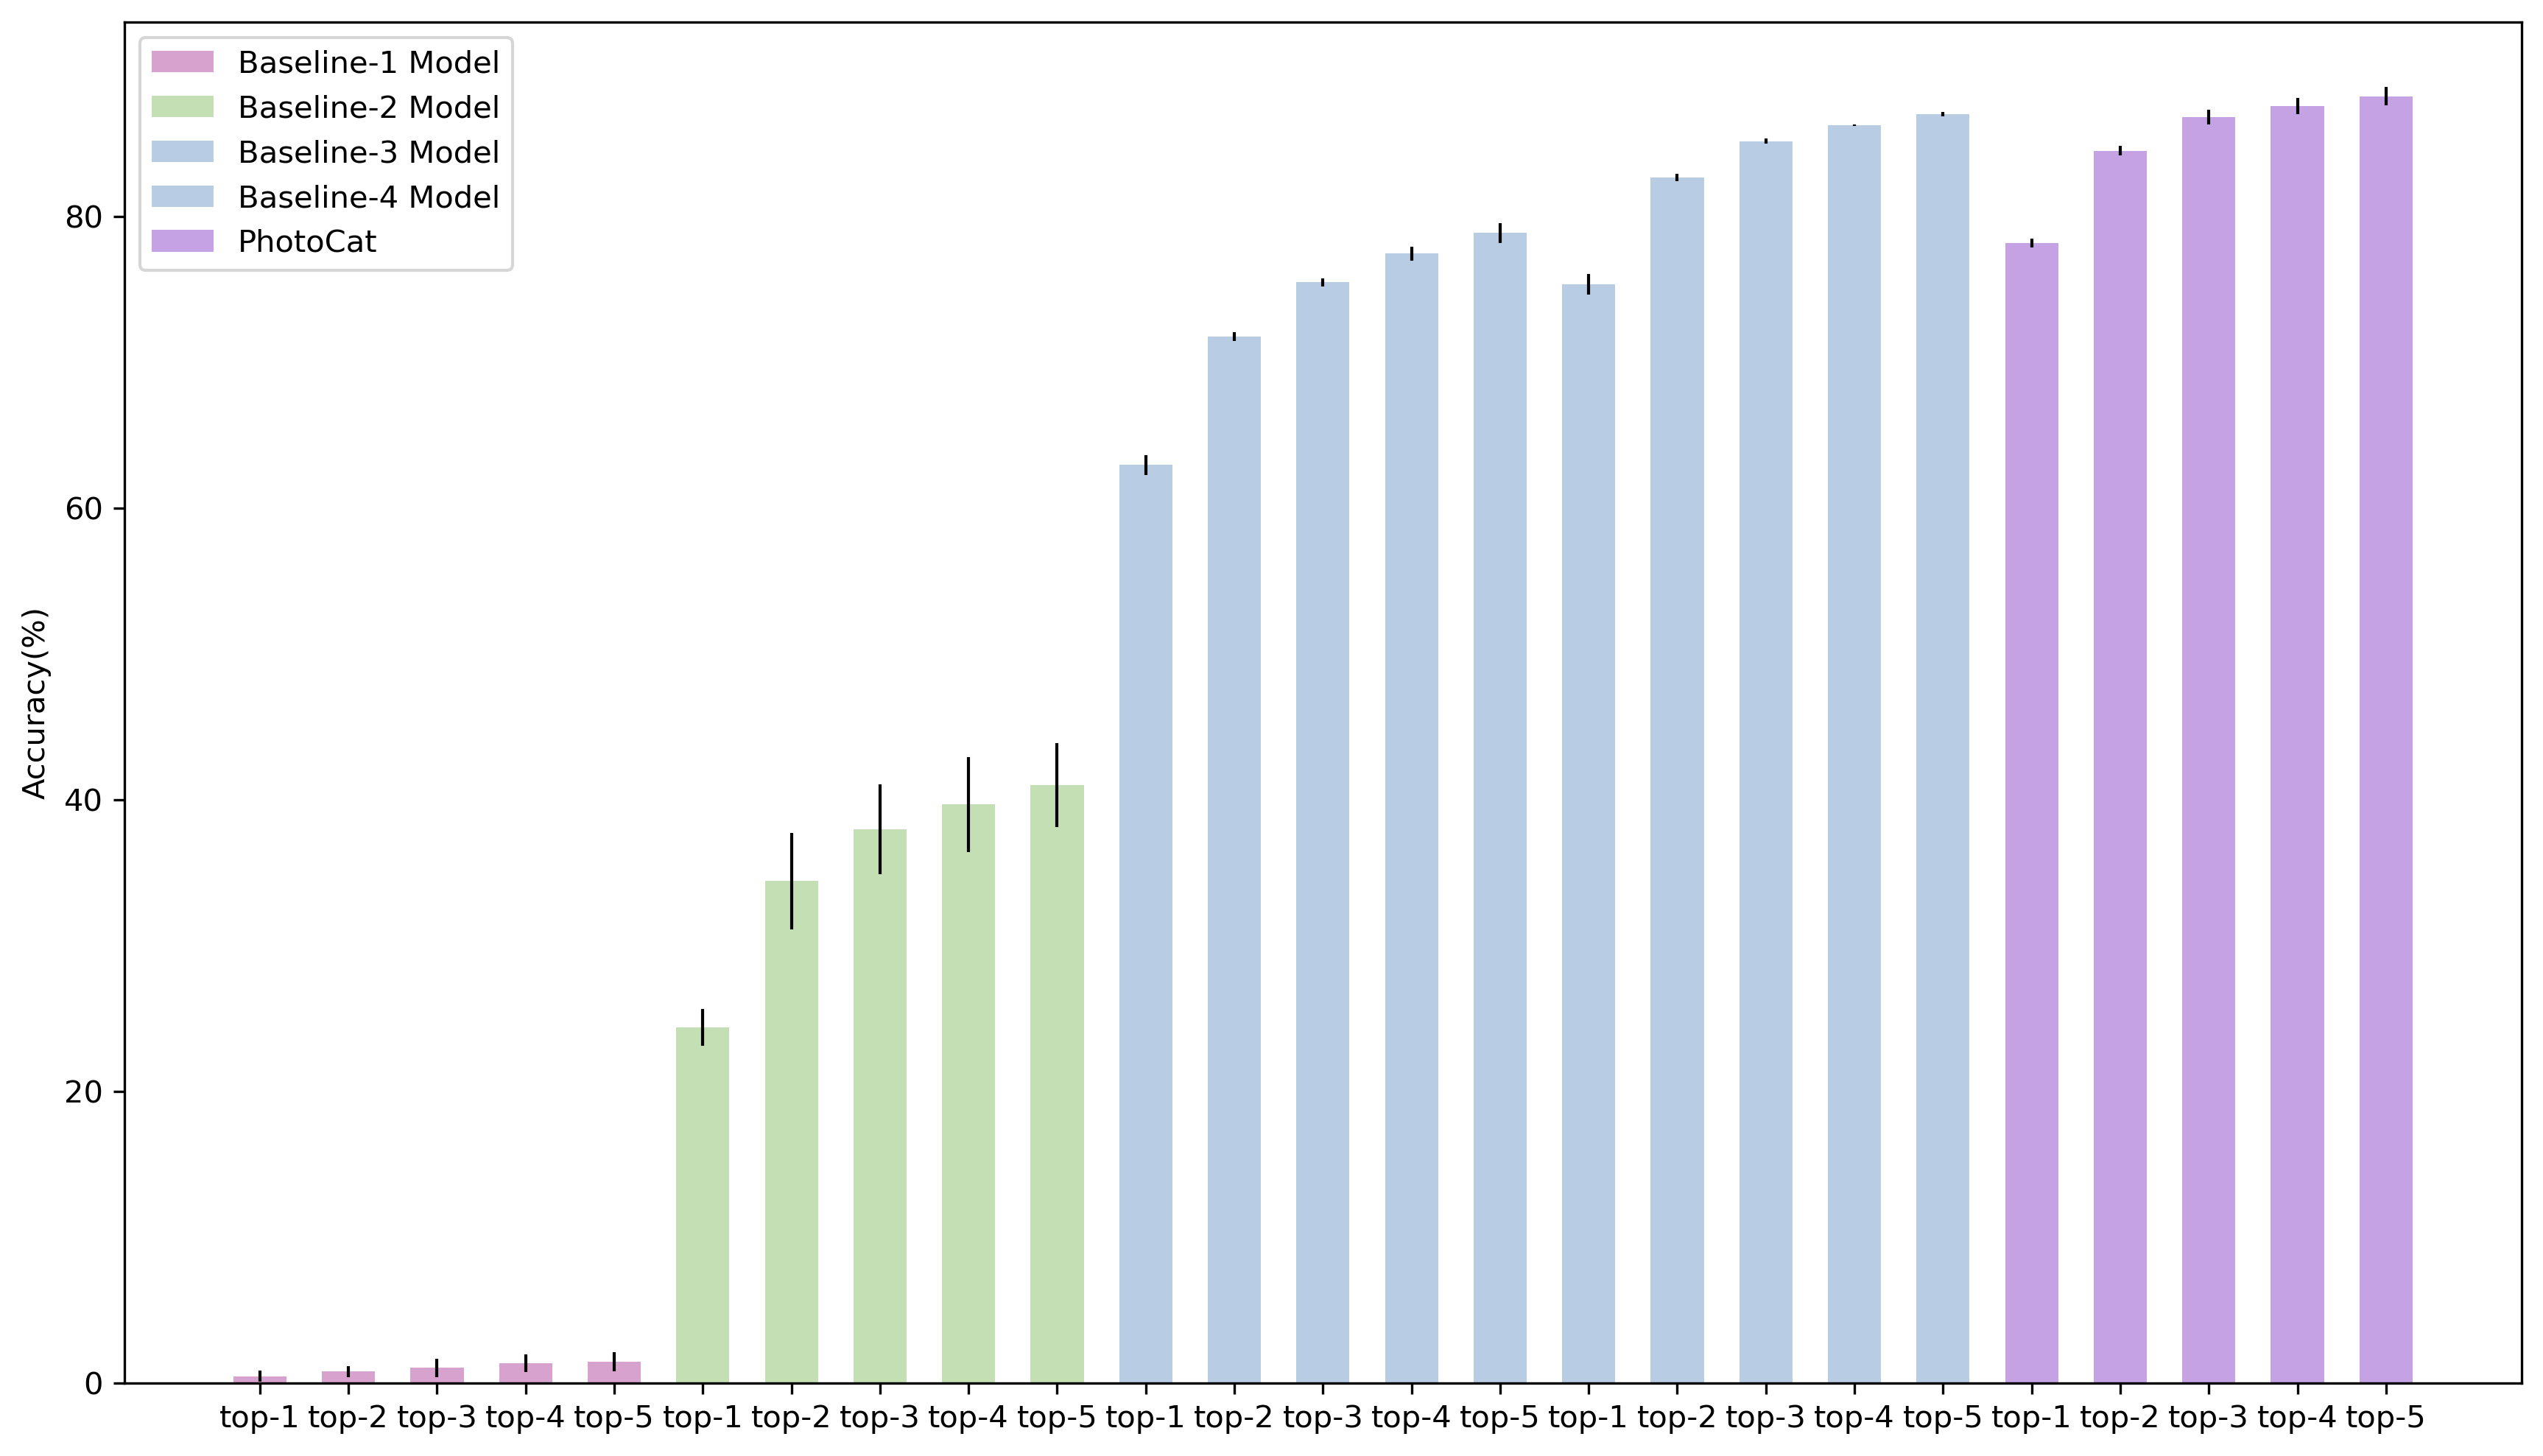

In [8]:
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)

label_base1 = [f"base-1: {i}" for i in df_data_base1["index"]]
label_base2 = [f"base-2: {i}" for i in df_data_base2["index"]]
label_base3 = [f"base-3: {i}" for i in df_data_base3["index"]]
label_base4 = [f"base-4: {i}" for i in df_data_base4["index"]]
label_origin = [f"origin: {i}" for i in df_data_origin["index"]]


plot(label_base1, "mean", colors[0], "error", df_data_base1, "Baseline-1 Model")
plot(label_base2, "mean", colors[1], "error", df_data_base2, "Baseline-2 Model")
plot(label_base3, "mean", colors[2], "error", df_data_base3, "Baseline-3 Model")
plot(label_base4, "mean", colors[2], "error", df_data_base4, "Baseline-4 Model")
plot(label_origin, "mean", colors[4], "error", df_data_origin, "PhotoCat")
plt.xticks(
    label_base1 + label_base2 + label_base3 + label_base4 + label_origin,
    [f"top-{i}" for i in range(1, 6)] * 5,
)
plt.ylabel("Accuracy(%)")
plt.legend(loc="best")
plt.show()

In [12]:
# 此处对换顺序
first = df_data_base1["mean"]
second = df_data_base2["mean"]
third = df_data_origin["mean"]
forth = df_data_base4["mean"]
fifth  = df_data_base3["mean"]

In [13]:
# 此处输出数据消融实验图
df_data_ablation = pd.DataFrame()
for i, tops in enumerate([first, second, third, forth, fifth]):
    df_data_ablation[f"Model {i}"] = round(tops, 2)
df_data_ablation.index = [f"Top {i +1 }" for i in range(5)]
df_data_ablation = df_data_ablation.T

In [14]:
df_data_ablation.to_csv("tmp/data_ablation.csv")

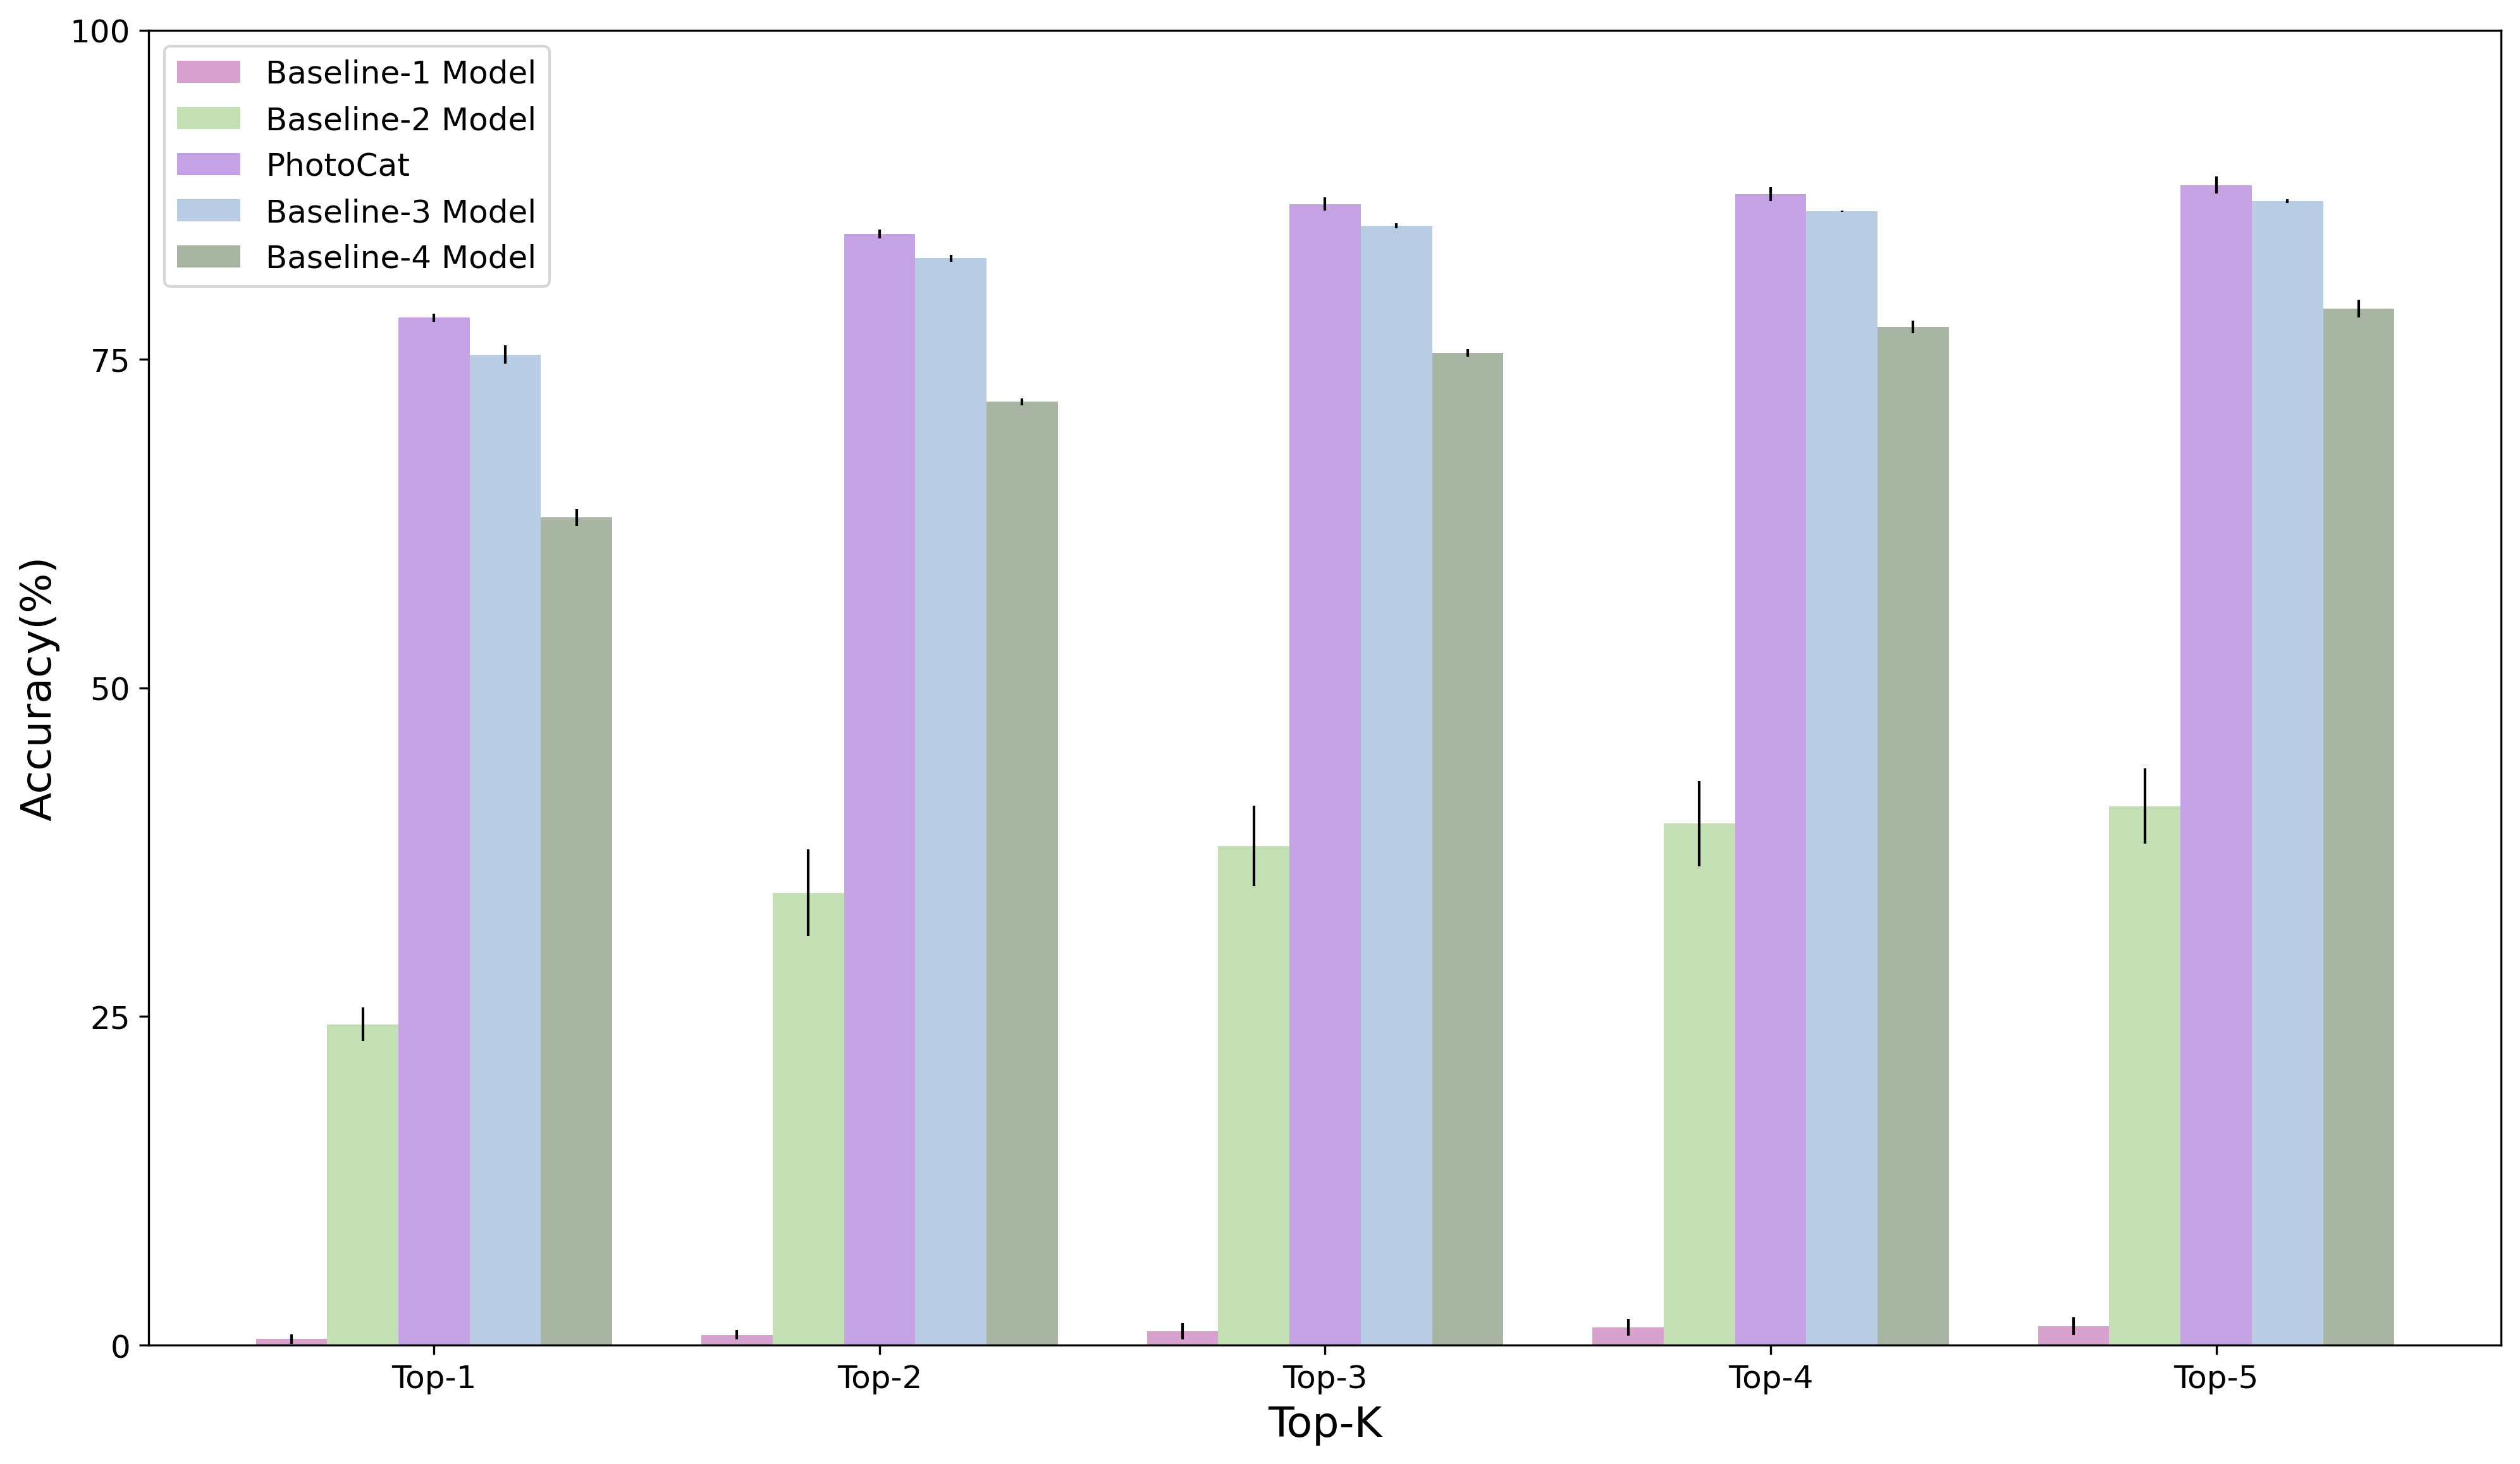

In [15]:
fig, ax = plt.subplots(figsize=(16, 9), dpi=300)

labels = [f"Top-{i}" for i in range(1, 6)]
x = np.arange(len(labels))  # x 轴刻度标签位置
width = 0.16  # 柱子的宽度

# 计算每个柱子在x轴上的位置，保证 x 轴刻度标签居中
# x - width，x， x + width 即每组数据在 x 轴上的位置
plt.bar(x - width * 2, first, width, label="Baseline-1 Model", color=colors[0])
plt.bar(x - width, second, width, label="Baseline-2 Model", color=colors[1])
plt.bar(x, third, width, label="PhotoCat", color=colors[4])
plt.bar(x + width, forth, width, label="Baseline-3 Model", color=colors[2])
plt.bar(x + width*2, fifth, width, label="Baseline-4 Model", color=colors[3])


plt.errorbar(
    x - width * 2,
    first,
    yerr=df_data_base1["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x - width,
    second,
    yerr=df_data_base2["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x,
    third,
    yerr=df_data_origin["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)
plt.errorbar(
    x + width,
    forth,
    yerr=df_data_base4["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)

plt.errorbar(
    x + width * 2,
    fifth,
    yerr=df_data_base3["error"],
    fmt=".",
    ecolor="k",
    elinewidth=1,
    capsize=0,
    ms=0,
)

plt.ylabel("Accuracy(%)", fontsize=16)
plt.xlabel("Top-K", fontsize=16)
# x轴刻度标签位置不进行计算
plt.xticks(x, labels=labels, fontsize=12)
plt.yticks(np.linspace(0, 100, 5), fontsize=12)
plt.legend(loc="best", fontsize=12)
plt.show()